In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
from matplotlib.patches import Ellipse
#sns.set(color_codes=True)
%matplotlib inline

In [43]:
Σ = [[1,0.7],
     [0.7,1]]
μ = [0,0]

X = np.random.multivariate_normal(μ, Σ, 100)
X.shape

(100, 2)

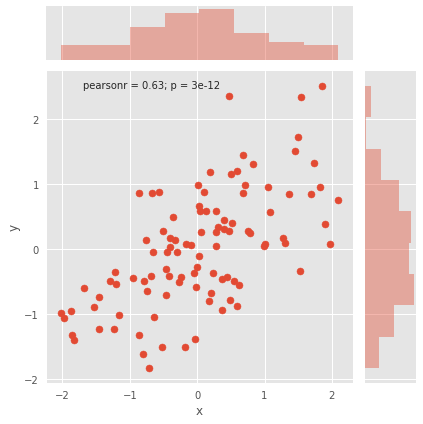

In [44]:
df = pd.DataFrame(X, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df, kind="scatter")

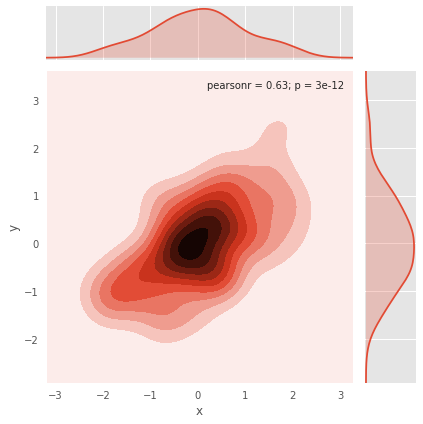

In [45]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

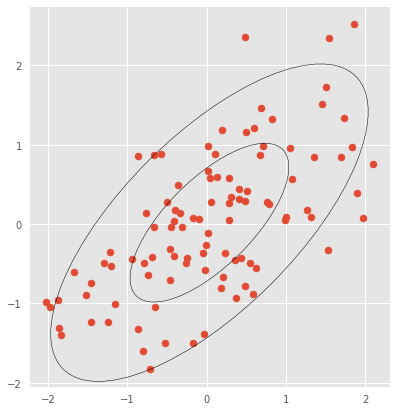

In [46]:
Λ, v = np.linalg.eig(Σ)
Λ = np.sqrt(Λ)
plt.figure(figsize=(10,7))
ax = plt.subplot(111, aspect='equal')
for j in range(1, 3):
    ell = Ellipse(xy=(np.mean(X[:,0]), np.mean(X[:,1])),
                  width=Λ[0]*j*2, height=Λ[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  color = 'black')
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.scatter(X[:,0], X[:,1])

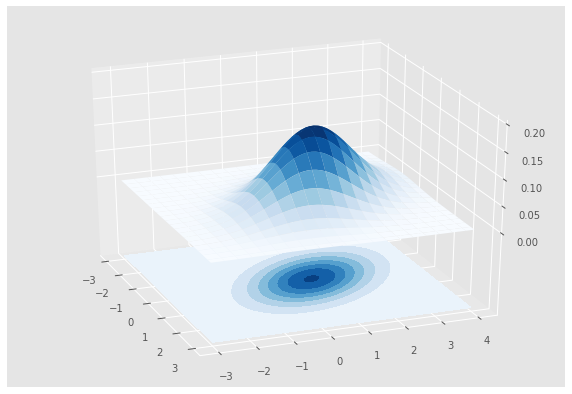

In [56]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

N = 60
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 4, N)
x, y = np.meshgrid(x, y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

X = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, X, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.Blues)

cset = ax.contourf(x, y, X, zdir='z', offset=-0.15, cmap=cm.Blues)

ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()